## Análisis Exploratorio de Datos del Dataset Telco Customer Churn

En este cuaderno de python exploraremos dos variables, una numerica y otra categorica, del dataset Telco-Customer Chur.

### 

* **Introducción**
  * Objetivo del análisis 
  * Descripción del dataset
* **Carga y Limpieza de Datos**
* **Análisis Exploratorio de Datos Univariado**
  * **Variable Numérica (MonthlyCharges):**
    * Estadísticos descriptivos
    * Visualización de la distribución
      * Histograma
      * Boxplot
      * Gráfico de violín
      * QQ-plot
    * Identificación de outliers
    * Evaluación de la normalidad
  * **Variable Categórica (MultipleLines):**
    * Frecuencias absolutas y relativas
    * Visualización de la distribución
      * Gráfico de barras
* **Análisis Exploratorio de Datos Bivariado/Multivariado**
  * **Relación entre variables numéricas:**
    * Matriz de correlación
  * **Relación entre variables categóricas:**
    * Tablas de contingencia
    * Gráficos de barras apiladas
  * **Relación entre variables numéricas y categóricas:**
    * Gráficos de caja
* **Preparación de Datos**
  * **Escalamiento:** Estandarización de variables numéricas
  * **Codificación:** Codificación de variables categóricas
  * **Selección de características:**
    * Selección de las características más relevantes para el modelo
      * Utilizando SelectKBest
* **Modelado**
  * **Selección del modelo:**
    * Justificación de la elección de los modelos (Decision Tree, Naive Bayes, Random Forest)
  * **Entrenamiento y evaluación del modelo:**
    * División de los datos en entrenamiento y prueba
    * Métricas de evaluación (accuracy)
* **Conclusiones**
  * **Conclusiones del EDA:** Resumen de los hallazgos más importantes
  * **Conclusiones del modelado:** Desempeño de los modelos y recomendaciones


### Herramientas utilizadas
* Python
* Pandas
* NumPy
* Matplotlib
* Seaborn
* Scikit-learn

*Fuente*: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Análisis Exploratorio de Datos del Dataset Telco Customer Churn

En este cuaderno de python exploraremos dos variables, una numerica y otra categorica, del dataset Telco-Customer Chur.

### 

* **Introducción**
  * Objetivo del análisis 
  * Descripción del dataset
* **Carga y Limpieza de Datos**
* **Análisis Exploratorio de Datos Univariado**
  * **Variable Numérica (MonthlyCharges):**
    * Estadísticos descriptivos
    * Visualización de la distribución
      * Histograma
      * Boxplot
      * Gráfico de violín
      * QQ-plot
    * Identificación de outliers
    * Evaluación de la normalidad
  * **Variable Categórica (MultipleLines):**
    * Frecuencias absolutas y relativas
    * Visualización de la distribución
      * Gráfico de barras
* **Análisis Exploratorio de Datos Bivariado/Multivariado**
  * **Relación entre variables numéricas:**
    * Matriz de correlación
  * **Relación entre variables categóricas:**
    * Tablas de contingencia
    * Gráficos de barras apiladas
  * **Relación entre variables numéricas y categóricas:**
    * Gráficos de caja
* **Preparación de Datos**
  * **Escalamiento:** Estandarización de variables numéricas
  * **Codificación:** Codificación de variables categóricas
  * **Selección de características:**
    * Selección de las características más relevantes para el modelo
      * Utilizando SelectKBest
* **Modelado**
  * **Selección del modelo:**
    * Justificación de la elección de los modelos (Decision Tree, Naive Bayes, Random Forest)
  * **Entrenamiento y evaluación del modelo:**
    * División de los datos en entrenamiento y prueba
    * Métricas de evaluación (accuracy)
* **Conclusiones**
  * **Conclusiones del EDA:** Resumen de los hallazgos más importantes
  * **Conclusiones del modelado:** Desempeño de los modelos y recomendaciones


### Herramientas utilizadas
* Python
* Pandas
* NumPy
* Matplotlib
* Seaborn
* Scikit-learn

*Fuente*: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
#Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


### **Carga y Limpieza de Datos**

In [2]:
#Importamos el dataset de telco para analisar el churn

df_customer_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Corregimos tipos a numericos
df_customer_churn['tenure'] = df_customer_churn['tenure'].astype(int)
df_customer_churn['TotalCharges'] = df_customer_churn['TotalCharges'].astype(str).replace(' ', '0').astype(float)

In [3]:
#Revisamos la informacion del dataset

print(df_customer_churn.describe().to_markdown())
print('\n')

#Revsiamos las columnas del dataset
print(df_customer_churn.info())
print('\n')

# Análisis de valores nulos
print(df_customer_churn.isnull().sum().to_markdown())
print('\n')

# Revisamos los primeros 5 registros
print(df_customer_churn.head().to_markdown())

|       |   SeniorCitizen |    tenure |   MonthlyCharges |   TotalCharges |
|:------|----------------:|----------:|-----------------:|---------------:|
| count |     7043        | 7043      |        7043      |        7043    |
| mean  |        0.162147 |   32.3711 |          64.7617 |        2279.73 |
| std   |        0.368612 |   24.5595 |          30.09   |        2266.79 |
| min   |        0        |    0      |          18.25   |           0    |
| 25%   |        0        |    9      |          35.5    |         398.55 |
| 50%   |        0        |   29      |          70.35   |        1394.55 |
| 75%   |        0        |   55      |          89.85   |        3786.6  |
| max   |        1        |   72      |         118.75   |        8684.8  |


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null 

# Descripción de las variables

| Columna | Descripción |
|---|---|
| customerID | Identificador único asignado a cada cliente. |
| gender | Género del cliente (masculino o femenino). |
| SeniorCitizen | Indica si el cliente es un ciudadano de la tercera edad (sí o no). |
| Partner | Indica si el cliente tiene pareja (sí o no). |
| Dependents | Indica si el cliente tiene dependientes (hijos, etc.) (sí o no). |
| tenure | Número de meses que el cliente ha sido suscriptor. |
| PhoneService | Indica si el cliente tiene servicio de teléfono (sí o no). |
| MultipleLines | Indica si el cliente tiene múltiples líneas telefónicas (sí o no). |
| InternetService | Tipo de servicio de internet (DSL, fibra óptica, ninguno). |
| OnlineSecurity | Indica si el cliente tiene un servicio de seguridad en línea (sí o no). |
| OnlineBackup | Indica si el cliente tiene un servicio de copia de seguridad en línea (sí o no). |
| DeviceProtection | Indica si el cliente tiene un servicio de protección de dispositivos (sí o no). |
| TechSupport | Indica si el cliente tiene un servicio de soporte técnico (sí o no). |
| StreamingTV | Indica si el cliente tiene un servicio de streaming de TV (sí o no). |
| StreamingMovies | Indica si el cliente tiene un servicio de streaming de películas (sí o no). |
| Contract | Tipo de contrato del cliente (mensual, un año, dos años). |
| PaperlessBilling | Indica si el cliente prefiere la facturación electrónica (sí o no). |
| PaymentMethod | Método de pago del cliente (tarjeta de crédito, cheque electrónico, etc.). |
| MonthlyCharges | Cargo mensual total del cliente. |
| TotalCharges | Cargo total acumulado del cliente. |
| Churn | Indica si el cliente ha cancelado el servicio (sí o no). |

### **Análisis Exploratorio de Datos Univariado**

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


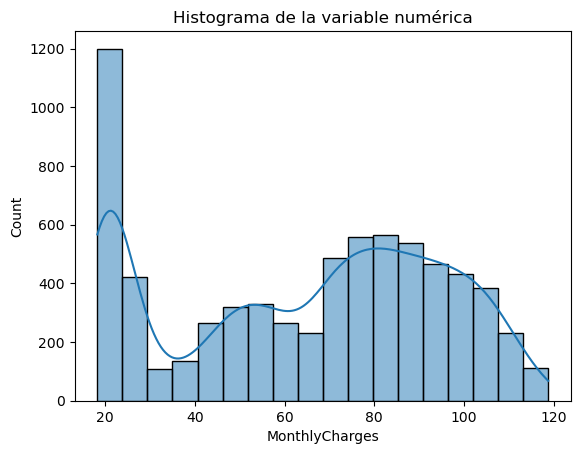

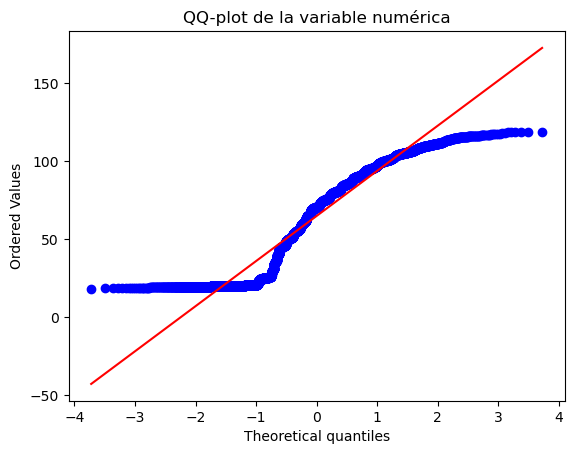

Asimetría: -0.22052443394398033
Kurtosis: -1.2572596945495056
Outliers: Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [4]:
#Analisis para una variable numerica

# 1. Estadísticos descriptivos básicos
print(df_customer_churn['MonthlyCharges'].describe())

# 2. Visualización de la distribución
sns.scatterplot(x = df_customer_churn.index, y = df_customer_churn['MonthlyCharges'],hue=df_customer_churn['Churn'])
plt.show()

# 3. Visualización de la distribución
sns.histplot(df_customer_churn['MonthlyCharges'], kde=True)
plt.title('Histograma de la variable numérica')
plt.show()

# 4. Boxplot para identificar outliers
sns.boxplot(x=df_customer_churn['MonthlyCharges'])
plt.title('Boxplot de la variable numérica')
plt.show()

# 5. Gráfico de violín para una visualización más detallada
sns.violinplot(x=df_customer_churn['MonthlyCharges'])
plt.title('Gráfico de violín de la variable numérica')
plt.show()

# 6. QQ-plot para evaluar la normalidad
from scipy import stats
stats.probplot(df_customer_churn['MonthlyCharges'], plot=plt)
plt.title('QQ-plot de la variable numérica')
plt.show()

# 7. Medidas de asimetría y kurtosis
print('Asimetría:', df_customer_churn['MonthlyCharges'].skew())
print('Kurtosis:', df_customer_churn['MonthlyCharges'].kurt())

# 8. Identificación de outliers (por ejemplo, utilizando IQR)
Q1 = df_customer_churn['MonthlyCharges'].quantile(0.25)
Q3 = df_customer_churn['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_customer_churn[(df_customer_churn['MonthlyCharges'] < Q1 - 1.5*IQR) | (df_customer_churn['MonthlyCharges'] > Q3 + 1.5*IQR)]
print('Outliers:', outliers)



count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


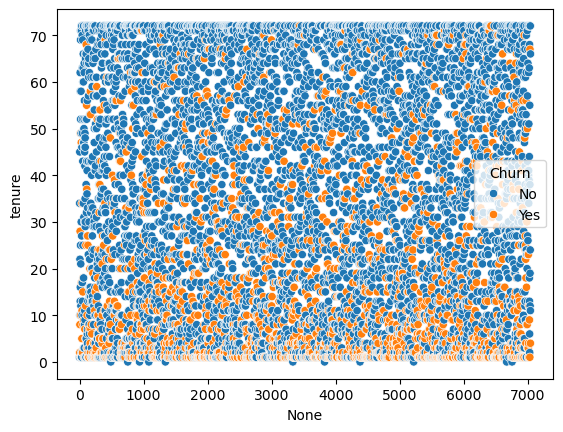

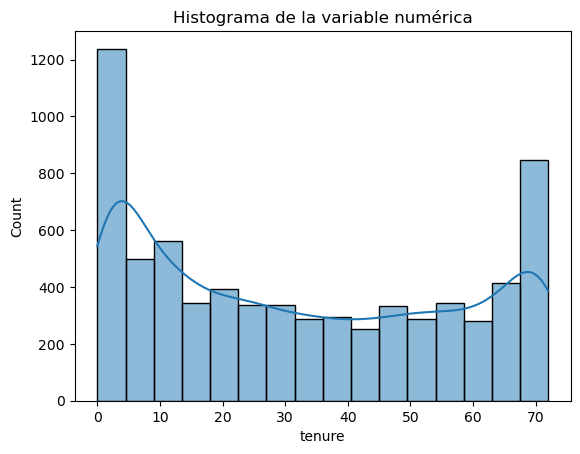

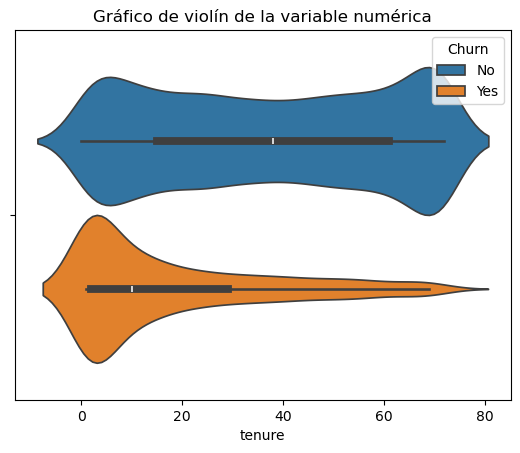

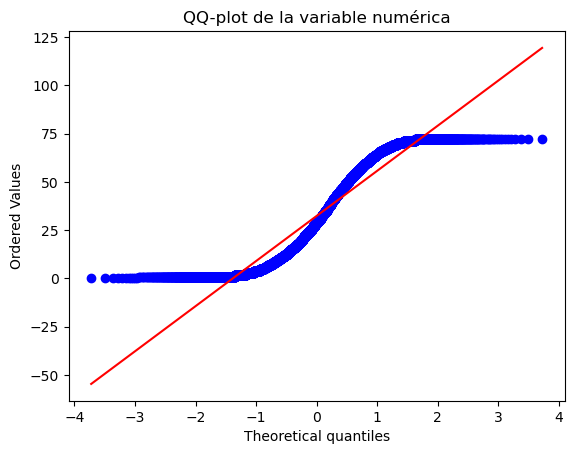

Asimetría: 0.2395397495619829
Kurtosis: -1.387371635971685
Outliers: Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [5]:
#Analisis para una variable numerica tenure

# 1. Estadísticos descriptivos básicos
print(df_customer_churn['tenure'].describe())

# 2. Visualización de la distribución
sns.scatterplot(x = df_customer_churn.index, y = df_customer_churn['tenure'],hue=df_customer_churn['Churn'])
plt.show()

# 3. Visualización de la distribución
sns.histplot(df_customer_churn['tenure'], kde=True)
plt.title('Histograma de la variable numérica')
plt.show()

# 4. Boxplot para identificar outliers
sns.boxplot(x=df_customer_churn['tenure'])
plt.title('Boxplot de la variable numérica')
plt.show()

# 5. Gráfico de violín para una visualización más detallada
sns.violinplot(x=df_customer_churn['tenure'],hue=df_customer_churn['Churn'])
plt.title('Gráfico de violín de la variable numérica')
plt.show()

# 6. QQ-plot para evaluar la normalidad
from scipy import stats
stats.probplot(df_customer_churn['tenure'], plot=plt)
plt.title('QQ-plot de la variable numérica')
plt.show()

# 7. Medidas de asimetría y kurtosis
print('Asimetría:', df_customer_churn['tenure'].skew())
print('Kurtosis:', df_customer_churn['tenure'].kurt())

# 8. Identificación de outliers (por ejemplo, utilizando IQR)
Q1 = df_customer_churn['tenure'].quantile(0.25)
Q3 = df_customer_churn['tenure'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_customer_churn[(df_customer_churn['tenure'] < Q1 - 1.5*IQR) | (df_customer_churn['tenure'] > Q3 + 1.5*IQR)]
print('Outliers:', outliers)

**Conclusiones**

La variable MontlyCharges muestra el valor mensual que los clientes pagan por su servicio. Es importante porque es el costo que el cliente percibe y puede determinar qué tan dispuesto está a seguir con su línea.

Conclusiones:

* Tenemos 7,030 registros completos sin nulos. Los valores can desde $18.25 hasta $118.75 y la media es $60.75

* En el primer grafico encontramos que la variable no está ordenada por el índice, data la gran cantidad de puntos es difícil identificar información en el gráfico y el histograma agrupado nos será más útil.

* El histograma nos muestra que la variable no es simétrica y tiene un rango de datos dominante entre los primeros valores, presumiblemente los planes más económicos. Con esta gráfica comenzamos a pensar que la variable no tiene un comportamiento normal.

* En el boxplot no se identifican valores atípicos u outliers.

* El grafico de violín nos da conclusiones similares al histograma.

* Al realizar el grafico QQ plot vemos que no se ajusta a la línea por y claramente vemos el efecto de la mayor existencia de los planes baratos. Esto nos hace concluir que la variable no tiene un comportamiento normal. 

* Finalmente, el coeficiente de asimetría negativo indica la cola a la izquierda. También, esto afecta la curtosis que es negativa lo cual indica que es una distribución más plana que la normal. Por último, al utilizar el rango Inter cuantil para identificar outliers no encontramos ninguno.

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
MultipleLines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: count, dtype: float64


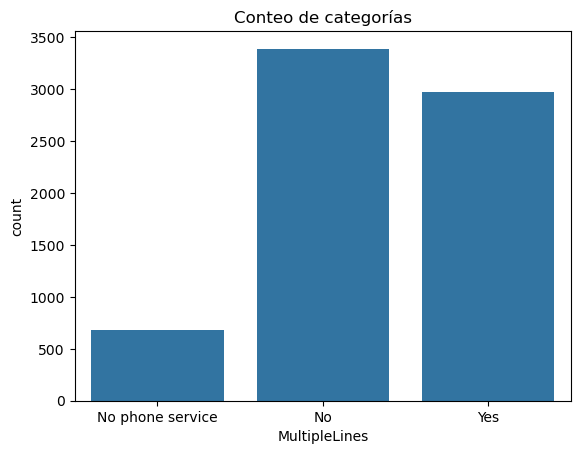

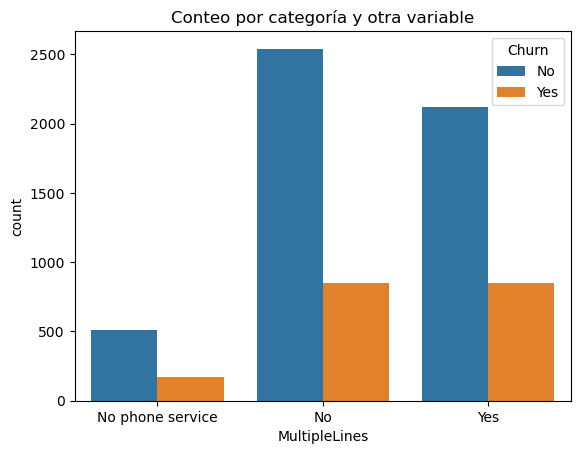

Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850

In [6]:
#Análisis para una variable categórica

# 1. Frecuencias absolutas y relativas
freq = df_customer_churn['MultipleLines'].value_counts()
print(freq)
print(freq / len(df_customer_churn))


# 2. Visualización de la distribución
sns.countplot(x='MultipleLines', data=df_customer_churn)
plt.title('Conteo de categorías')
plt.show()

# 3. Gráfico de barras apiladas (si tienes otra variable categórica)
sns.countplot(x='MultipleLines', hue='Churn', data=df_customer_churn)
plt.title('Conteo por categoría y otra variable')
plt.show()

# 4. Tabla de frecuencias cruzadas (si tienes otra variable categórica)
pd.crosstab(df_customer_churn['MultipleLines'], df_customer_churn['Churn'])


**Conclusiones**

La variable MultipleLines indica si una persona tiene varias líneas dentro de su servicio. Esto puede provocar que si tiene varios servicios contratados sea probable que se quede con Telco.

Primero, identificamos los posibles valores que son No, Yes y No phone services. Se observa que el dataset está equilibrado entre Yes (42.1%) y No(48.1%), pero No pone services (9.6%) está subrepresentados.

Por ultimo, vamos la relación entre está variable y la variable objetivo (Churn) en una tabla donde observamos que la cantidad de los clientes que se quedan en la categoría de Yes es mayor (29%) que en las opciones de No(25%) y No phone services(29%)


### **Análisis Exploratorio de Datos Bivariado/Multivariado**

In [7]:
#Revisamos el dataset
df_customer_churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

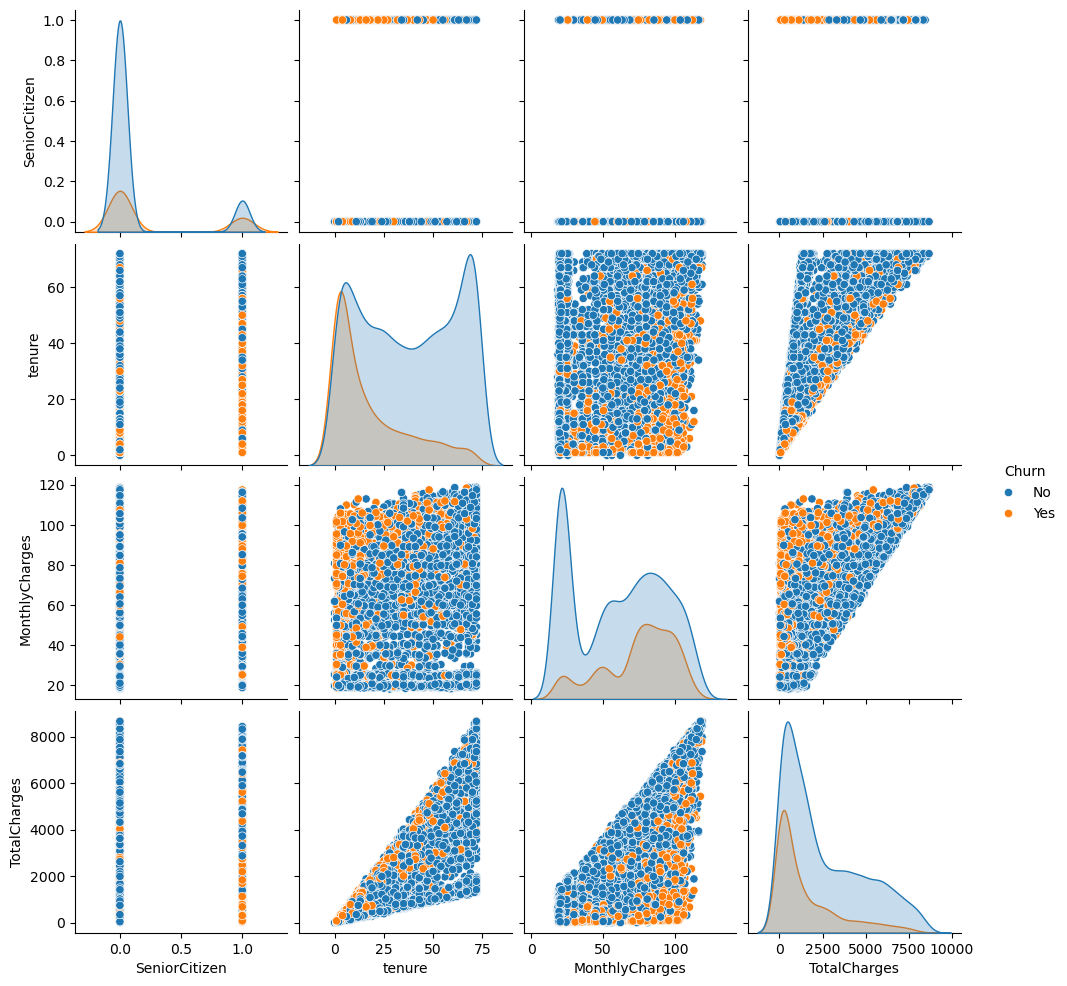

In [8]:
#Revisamos las columnas numericas del dataset usando el churn como diferenciador
sns.pairplot(df_customer_churn, hue='Churn')

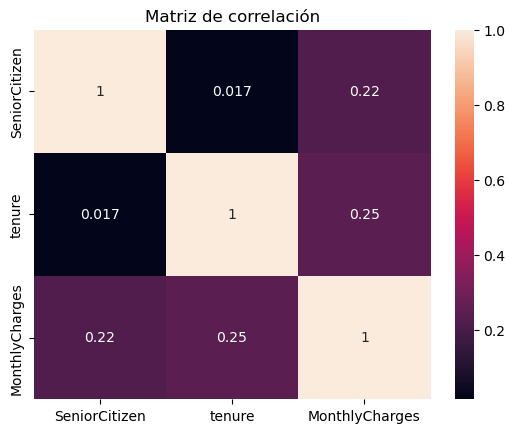

In [9]:
# Matriz de correlación de las variables numericas, no se observa una correlacion fuerte entre las variables
corr_matrix = df_customer_churn[['SeniorCitizen', 'tenure', 'MonthlyCharges']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Matriz de correlación')
plt.show()

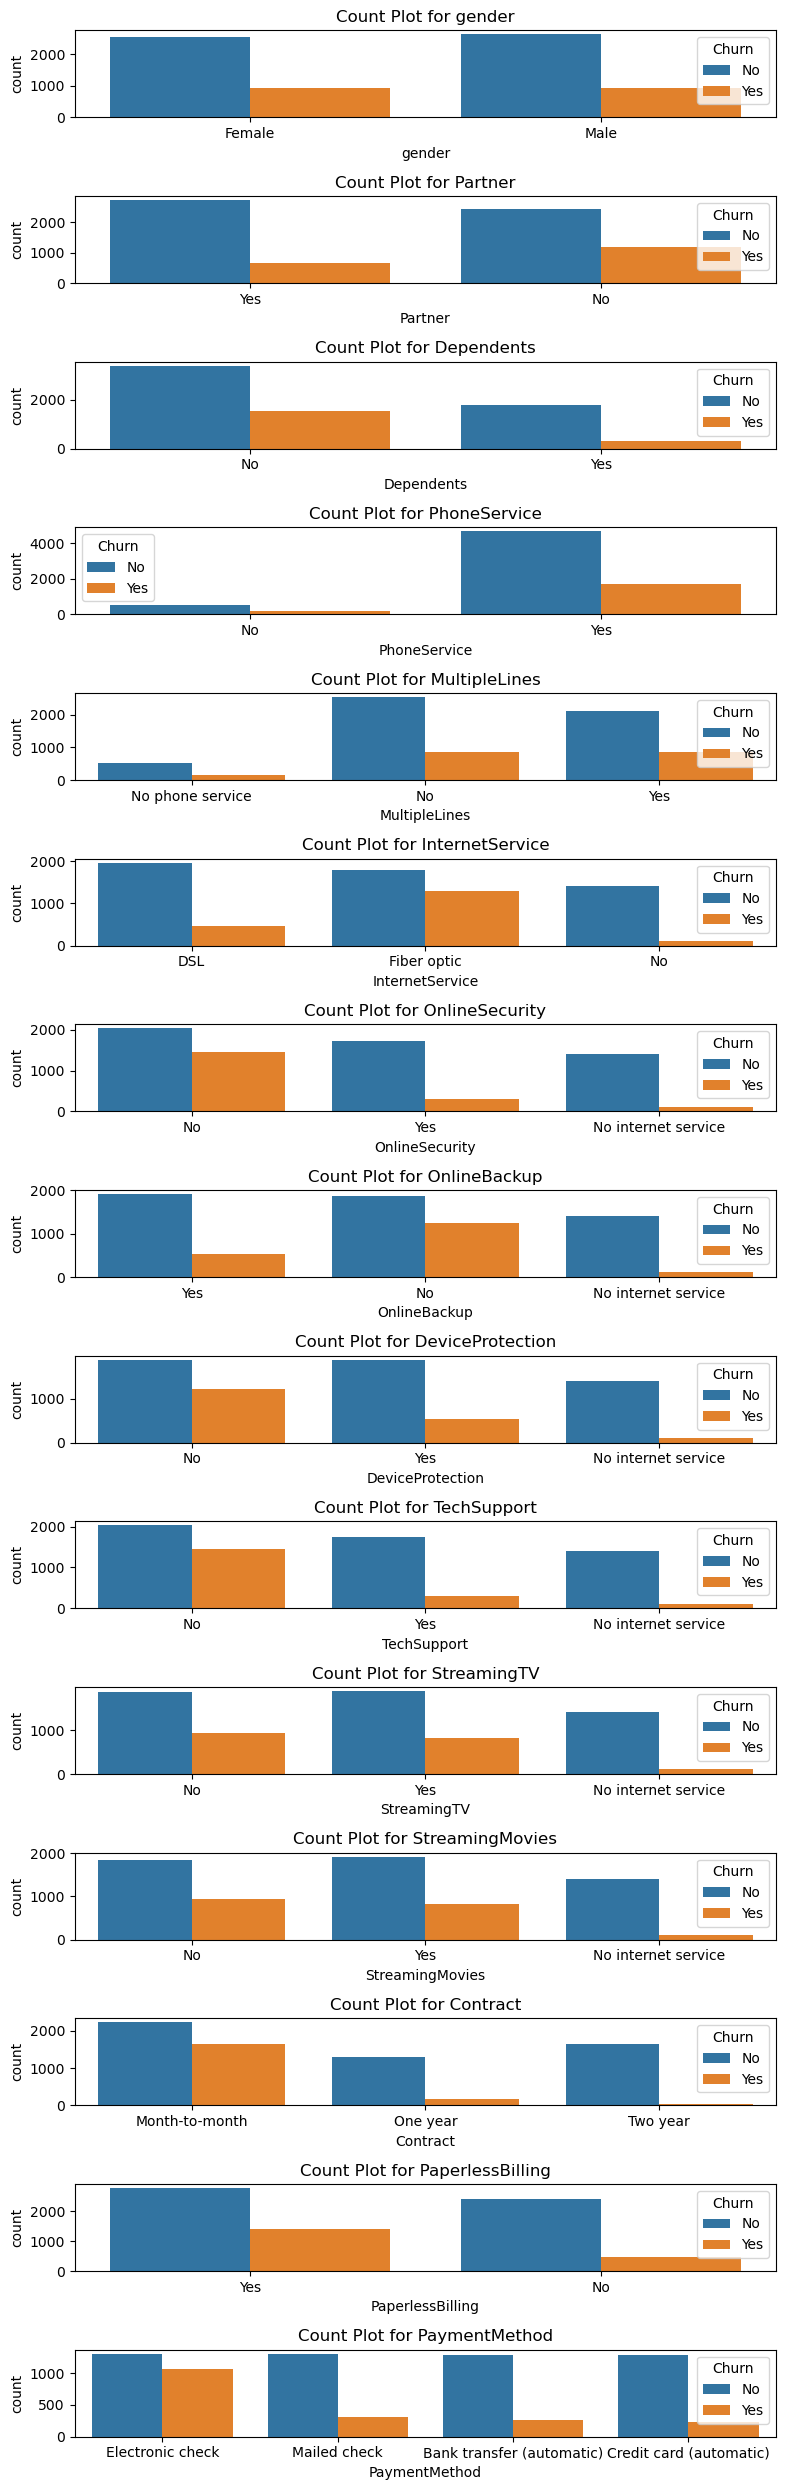

In [10]:

categorical_variables = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(categorical_variables), figsize=(8, 25))

# Iterate over each categorical variable and create a bar plot
for i, variable in enumerate(categorical_variables):
    sns.countplot(x=variable, data=df_customer_churn, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Count Plot for {variable}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
# Análisis categórico vs. categórico
# Tablas de contingencia
for i in categorical_variables:
    print(pd.crosstab(df_customer_churn['Churn'], df_customer_churn[i],normalize=True))
    print('-----------------------------------')

gender    Female      Male
Churn                     
No      0.361920  0.372710
Yes     0.133324  0.132046
-----------------------------------
Partner        No       Yes
Churn                      
No       0.346585  0.388045
Yes      0.170382  0.094988
-----------------------------------
Dependents        No       Yes
Churn                         
No          0.481329  0.253301
Yes         0.219083  0.046287
-----------------------------------
PhoneService        No       Yes
Churn                           
No            0.072696  0.661934
Yes           0.024137  0.241232
-----------------------------------
MultipleLines        No  No phone service       Yes
Churn                                              
No             0.360784          0.072696  0.301150
Yes            0.120545          0.024137  0.120687
-----------------------------------
InternetService       DSL  Fiber optic        No
Churn                                           
No               0.278574     0.255431

**Conclusiones**

* En el dataset solamente tenemos 3 variables numericas SeniorCitizen, tenure y MonthlyCharges. 

* Al analizar la correlacion entre ellas encontramos que es muy baja asi que no tienen multicolinealidad. Tambien, nos damos cuenta que la variables SeniorCitizen es una variable tipo binaria. 

* Luego para analizar el resto de variables categoricas, se procede a realizar un analisis de frecuencia para cada una de ellas con respecto a la variable Churn. Lo que buscamos en estos graficos son diferencias en las proporciones de Churn para cada categoria de las variables categoricas.

* Encontramos algunas diferencias en Partner, Dependents, PhoneService, InternertService, OnlineSecurity, OnlineBackup, Techsupport, Contract, PapperlesBilling and PaymenyMethod.

En la siguiente etapa aplicaremos labeling encoding para convertir las variables categoricas en numericas.


### **Preparación de Datos**


In [12]:
# Colocamos las variables numericas en una lista

numeric_cols = [col for col in df_customer_churn.columns if df_customer_churn[col].dtype in [float,int]]
numeric_cols

#Vamos a escalar las variables numericas
scaler = StandardScaler()
scaler.fit(df_customer_churn[numeric_cols])
df_customer_churn[numeric_cols] = scaler.transform(df_customer_churn[numeric_cols])

In [13]:
df_customer_churn[numeric_cols].describe()

tenure  MonthlyCharges  TotalCharges
count  7.043000e+03    7.043000e+03  7.043000e+03
mean  -2.421273e-17   -6.406285e-17 -3.783239e-17
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.318165e+00   -1.545860e+00 -1.005780e+00
25%   -9.516817e-01   -9.725399e-01 -8.299464e-01
50%   -1.372744e-01    1.857327e-01 -3.905282e-01
75%    9.214551e-01    8.338335e-01  6.648034e-01
max    1.613701e+00    1.794352e+00  2.825806e+00

In [14]:
df_customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
#Varificamos si hay valores nulos
df_customer_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
# Quitamos el ID de los clientes

df_customer_churn.drop(['customerID'], axis=1, inplace=True)

In [17]:
# Unificamos categorias dentro de las variables categoricas

df_customer_churn['MultipleLines']= df_customer_churn['MultipleLines'].str.replace('No phone service', 'No')
df_customer_churn['OnlineSecurity']= df_customer_churn['OnlineSecurity'].str.replace('No internet service', 'No')
df_customer_churn['OnlineBackup']= df_customer_churn['OnlineBackup'].str.replace('No internet service', 'No')
df_customer_churn['DeviceProtection']= df_customer_churn['DeviceProtection'].str.replace('No internet service', 'No')
df_customer_churn['TechSupport']= df_customer_churn['TechSupport'].str.replace('No internet service', 'No')
df_customer_churn['StreamingTV']= df_customer_churn['StreamingTV'].str.replace('No internet service', 'No')
df_customer_churn['StreamingMovies']= df_customer_churn['StreamingMovies'].str.replace('No internet service', 'No')

In [18]:
#Ahora vamos a procesar las variables categoricas

categorical_cols = [col for col in df_customer_churn.columns if df_customer_churn[col].dtype == 'object']

In [19]:

encoder = OneHotEncoder(drop = 'if_binary')
encoder.fit(df_customer_churn[categorical_cols])  
pd.DataFrame(encoder.transform(df_customer_churn[categorical_cols]).toarray(), columns=encoder.get_feature_names_out(categorical_cols))

gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0             0.0          1.0             0.0               0.0   
1             1.0          0.0             0.0               1.0   
2             1.0          0.0             0.0               1.0   
3             1.0          0.0             0.0               0.0   
4             0.0          0.0             0.0               1.0   
...           ...          ...             ...               ...   
7038          1.0          1.0             1.0               1.0   
7039          0.0          1.0             1.0               1.0   
7040          0.0          1.0             1.0               0.0   
7041          1.0          1.0             0.0               1.0   
7042          1.0          0.0             0.0               1.0   

      MultipleLines_Yes  InternetService_DSL  InternetService_Fiber optic  \
0                   0.0                  1.0                          0.0   
1                   0.0                  1.0                          0.0   
2                   0.0                  1.0                          0.0   
3                   0.0                  1.0                          0.0   
4                   0.0                  0.0                          1.0   
...                 ...                  ...                          ...   
7038                1.0                  1.0                          0.0   
7039                1.0                  0.0                          1.0   
7040                0.0                  1.0                          0.0   
7041                1.0                  0.0                          1.0   
7042                0.0                  0.0                          1.0   

      InternetService_No  OnlineSecurity_Yes  OnlineBackup_Yes  ...  \
0                    0.0                 0.0               1.0  ...   
1                    0.0                 1.0               0.0  ...   
2                    0.0                 1.0               1.0  ...   
3                    0.0                 1.0               0.0  ...   
4                    0.0                 0.0               0.0  ...   
...                  ...                 ...               ...  ...   
7038                 0.0                 1.0               0.0  ...   
7039                 0.0                 0.0               1.0  ...   
7040                 0.0                 1.0               0.0  ...   
7041                 0.0                 0.0               0.0  ...   
7042                 0.0                 1.0               0.0  ...   

      StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                     0.0                      1.0                0.0   
1                     0.0                      0.0                1.0   
2                     0.0                      1.0                0.0   
3                     0.0                      0.0                1.0   
4                     0.0                      1.0                0.0   
...                   ...                      ...                ...   
7038                  1.0                      0.0                1.0   
7039                  1.0                      0.0                1.0   
7040                  0.0                      1.0                0.0   
7041                  0.0                      1.0                0.0   
7042                  1.0                      0.0                0.0   

      Contract_Two year  PaperlessBilling_Yes  \
0                   0.0                   1.0   
1                   0.0                   0.0   
2                   0.0                   1.0   
3                   0.0                   0.0   
4                   0.0                   1.0   
...                 ...                   ...   
7038                0.0                   1.0   
7039                0.0                   1.0   
7040                0.0                   1.0   
7041                0.0                   1.

In [20]:
#Unimos el dataset al nuevo con las vartiables dummies
df_customer_churn = pd.concat([df_customer_churn, pd.DataFrame(encoder.transform(df_customer_churn[categorical_cols]).toarray(), columns=encoder.get_feature_names_out(categorical_cols),index=df_customer_churn.index)], axis=1)

In [21]:
df_customer_churn.head()

gender  SeniorCitizen Partner Dependents    tenure PhoneService  \
0  Female              0     Yes         No -1.277445           No   
1    Male              0      No         No  0.066327          Yes   
2    Male              0      No         No -1.236724          Yes   
3    Male              0      No         No  0.514251           No   
4  Female              0      No         No -1.236724          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0            No             DSL             No          Yes  ...   
1            No             DSL            Yes           No  ...   
2            No             DSL            Yes          Yes  ...   
3            No             DSL            Yes           No  ...   
4            No     Fiber optic             No           No  ...   

  StreamingMovies_Yes Contract_Month-to-month Contract_One year  \
0                 0.0                     1.0               0.0   
1                 0.0                     0.0               1.0   
2                 0.0                     1.0               0.0   
3                 0.0                     0.0               1.0   
4                 0.0                     1.0               0.0   

  Contract_Two year PaperlessBilling_Yes  \
0               0.0                  1.0   
1               0.0                  0.0   
2               0.0                  1.0   
3               0.0                  0.0   
4               0.0                  1.0   

  PaymentMethod_Bank transfer (automatic)  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     1.0   
4                                     0.0   

  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                   0.0                             1.0   
1                                   0.0                             0.0   
2                                   0.0                             0.0   
3                                   0.0                             0.0   
4                                   0.0                             1.0   

   PaymentMethod_Mailed check Churn_Yes  
0                         0.0       0.0  
1                         1.0       0.0  
2                         1.0       1.0  
3                         0.0       0.0  
4                         0.0       1.0  

[5 rows x 43 columns]

In [22]:
# Eliminamos las variables originales
df_customer_churn.drop(categorical_cols, axis=1, inplace=True)

In [23]:
# Revisamos las columnas del dataset
df_customer_churn.dtypes

SeniorCitizen                                int64
tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Male                                float64
Partner_Yes                                float64
Dependents_Yes                             float64
PhoneService_Yes                           float64
MultipleLines_Yes                          float64
InternetService_DSL                        float64
InternetService_Fiber optic                float64
InternetService_No                         float64
OnlineSecurity_Yes                         float64
OnlineBackup_Yes                           float64
DeviceProtection_Yes                       float64
TechSupport_Yes                            float64
StreamingTV_Yes                            float64
StreamingMovies_Yes                        float64
Contract_Month-to-month                    float64
Contract_One year              

### **Selección de características:**

In [24]:
# Matriz de correlación con todas las variables
corr_matrix = df_customer_churn.corr()
corr_matrix_with_churn = corr_matrix['Churn_Yes']

corr_matrix_with_churn.sort_values()

tenure                                    -0.352229
Contract_Two year                         -0.302253
InternetService_No                        -0.227890
TotalCharges                              -0.198324
Contract_One year                         -0.177820
OnlineSecurity_Yes                        -0.171226
TechSupport_Yes                           -0.164674
Dependents_Yes                            -0.164221
Partner_Yes                               -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMethod_Mailed check                -0.091683
OnlineBackup_Yes                          -0.082255
DeviceProtection_Yes                      -0.066160
gender_Male                               -0.008612
PhoneService_Yes                           0.011942
MultipleLines_Yes                          0.040102
StreamingMovies_Yes                        0.061382
StreamingTV_

In [25]:
# Seleccionamos las variables con una correlación mayor a 0.1
mask = abs(corr_matrix_with_churn) >= 0.1
df_customer_churn[mask.index.to_list()]

SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0                 0 -1.277445       -1.160323     -0.992611          0.0   
1                 0  0.066327       -0.259629     -0.172165          1.0   
2                 0 -1.236724       -0.362660     -0.958066          1.0   
3                 0  0.514251       -0.746535     -0.193672          1.0   
4                 0 -1.236724        0.197365     -0.938874          0.0   
...             ...       ...             ...           ...          ...   
7038              0 -0.340876        0.665992     -0.127605          1.0   
7039              0  1.613701        1.277533      2.242606          0.0   
7040              0 -0.870241       -1.168632     -0.852932          0.0   
7041              1 -1.155283        0.320338     -0.870513          1.0   
7042              0  1.369379        1.358961      2.013897          1.0   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  MultipleLines_Yes  \
0             1.0             0.0               0.0                0.0   
1             0.0             0.0               1.0                0.0   
2             0.0             0.0               1.0                0.0   
3             0.0             0.0               0.0                0.0   
4             0.0             0.0               1.0                0.0   
...           ...             ...               ...                ...   
7038          1.0             1.0               1.0                1.0   
7039          1.0             1.0               1.0                1.0   
7040          1.0             1.0               0.0                0.0   
7041          1.0             0.0               1.0                1.0   
7042          0.0             0.0               1.0                0.0   

      InternetService_DSL  ...  StreamingMovies_Yes  Contract_Month-to-month  \
0                     1.0  ...                  0.0                      1.0   
1                     1.0  ...                  0.0                      0.0   
2                     1.0  ...                  0.0                      1.0   
3                     1.0  ...                  0.0                      0.0   
4                     0.0  ...                  0.0                      1.0   
...                   ...  ...                  ...                      ...   
7038                  1.0  ...                  1.0                      0.0   
7039                  0.0  ...                  1.0                      0.0   
7040                  1.0  ...                  0.0                      1.0   
7041                  0.0  ...                  0.0                      1.0   
7042                  0.0  ...                  1.0                      0.0   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                   0.0                0.0                   1.0   
1                   1.0                0.0                   0.0   
2                   0.0                0.0                   1.0   
3                   1.0                0.0                   0.0   
4                   0.0                0.0                   1.0   
...                 ...                ...                   ...   
7038                1.0                0.0                   1.0   
7039                1.0                0.0                   1.0   
7040                0.0                0.0                   1.0   
7041                0.0                0.0                   1.0   
7042                0.0                1.0                   1.0   

      PaymentMethod_Bank transfer (automatic)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         1.0   
4                                         0.0   
...                                       ...   
7038                                      0.0   
7039                              

In [26]:
#Ahora vamos a hacer feature selection con selectkbest y f_classif

y = df_customer_churn['Churn_Yes']
X = df_customer_churn.drop('Churn_Yes', axis=1)

#Seleccionamos las 5 mejores variables
feature_selection = SelectKBest(f_classif, k=5)
X_new = feature_selection.fit_transform(X, y)

In [27]:
#Visualizamos las variables seleccionadas con su score

pd.concat([pd.DataFrame(X.columns.to_list(), columns=['Feature']), pd.DataFrame(feature_selection.scores_, columns=['Score']),pd.DataFrame(feature_selection.get_support(), columns=['Selection'])], axis=1).sort_values(by='Score', ascending=False)


Feature        Score  Selection
18                  Contract_Month-to-month  1382.340697       True
1                                    tenure   997.268010       True
10              InternetService_Fiber optic   738.046042       True
20                        Contract_Two year   707.919254       True
24           PaymentMethod_Electronic check   706.195028       True
11                       InternetService_No   385.698588      False
3                              TotalCharges   288.278961      False
2                            MonthlyCharges   273.463704      False
21                     PaperlessBilling_Yes   268.985218      False
19                        Contract_One year   229.905741      False
12                       OnlineSecurity_Yes   212.666199      False
15                          TechSupport_Yes   196.255405      False
6                            Dependents_Yes   195.149314      False
0                             SeniorCitizen   164.041424      False
5                               Partner_Yes   163.060036      False
23    PaymentMethod_Credit card (automatic)   129.330975      False
9                       InternetService_DSL   110.338532      False
22  PaymentMethod_Bank transfer (automatic)    99.315060      False
25               PaymentMethod_Mailed check    59.686545      False
13                         OnlineBackup_Yes    47.962955      False
14                     DeviceProtection_Yes    30.954780      False
16                          StreamingTV_Yes    28.261124      False
17                      StreamingMovies_Yes    26.628665      False
8                         MultipleLines_Yes    11.341439      False
7                          PhoneService_Yes     1.004266      False
4                               gender_Male     0.522257      False

In [42]:
# Creamos una mascara para seleccionar las variables
mask2 = feature_selection.get_support()

X_fs = X[X.columns[mask2]]

X_fs.columns

Index(['tenure', 'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check'],
      dtype='object')

### Analizamos las variables seleccionadas

In [43]:
X_fs['Churn_yes']=y

C:\Users\mario\AppData\Local\Temp\ipykernel_26552\1648754274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_fs['Churn_yes']=y


In [45]:
X_fs

tenure  InternetService_Fiber optic  Contract_Month-to-month  \
0    -1.277445                          0.0                      1.0   
1     0.066327                          0.0                      0.0   
2    -1.236724                          0.0                      1.0   
3     0.514251                          0.0                      0.0   
4    -1.236724                          1.0                      1.0   
...        ...                          ...                      ...   
7038 -0.340876                          0.0                      0.0   
7039  1.613701                          1.0                      0.0   
7040 -0.870241                          0.0                      1.0   
7041 -1.155283                          1.0                      1.0   
7042  1.369379                          1.0                      0.0   

      Contract_Two year  PaymentMethod_Electronic check  Churn_yes  
0                   0.0                             1.0        0.0  
1                   0.0                             0.0        0.0  
2                   0.0                             0.0        1.0  
3                   0.0                             0.0        0.0  
4                   0.0                             1.0        1.0  
...                 ...                             ...        ...  
7038                0.0                             0.0        0.0  
7039                0.0                             0.0        0.0  
7040                0.0                             1.0        0.0  
7041                0.0                             0.0        1.0  
7042                1.0                             0.0        0.0  

[7043 rows x 6 columns]

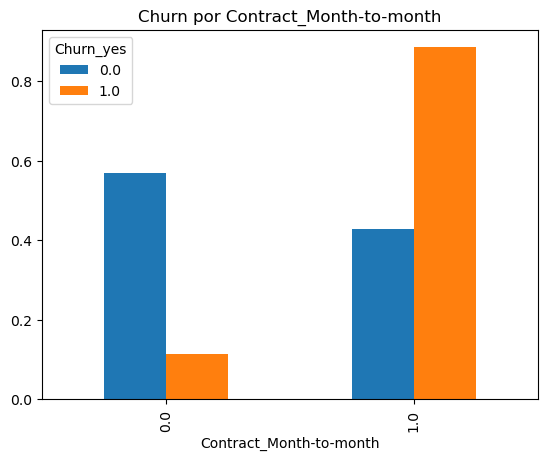

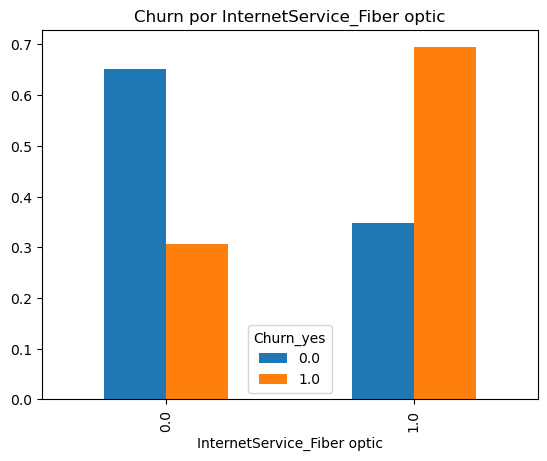

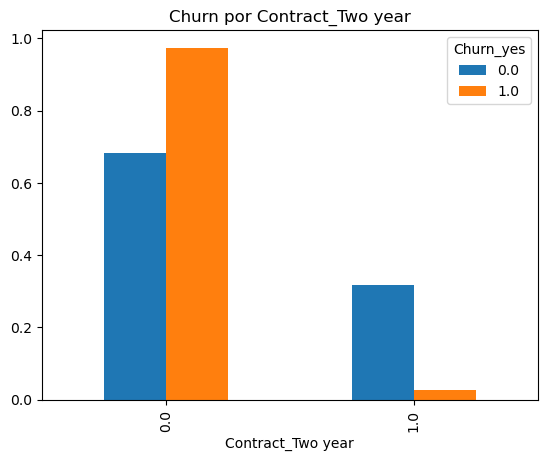

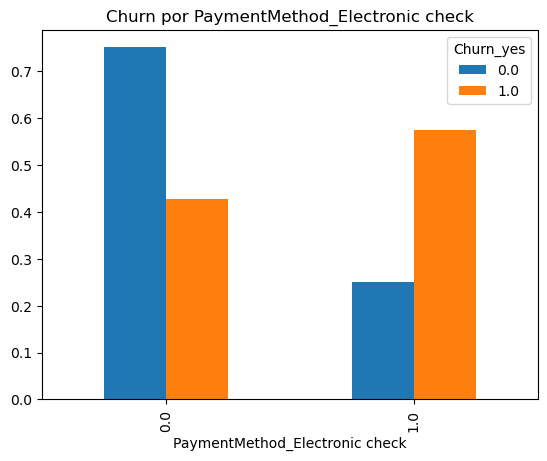

In [31]:
#Creating a barplot using Crosstab function in pandas python
pd.crosstab(X_fs['Contract_Month-to-month'], X_fs['Churn_yes'],normalize='columns').plot(kind='bar',label=True)
plt.title('Churn por Contract_Month-to-month')
plt.show()

pd.crosstab(X_fs['InternetService_Fiber optic'], X_fs['Churn_yes'],normalize='columns').plot(kind='bar')
plt.title('Churn por InternetService_Fiber optic')
plt.show()

pd.crosstab(X_fs['Contract_Two year'], X_fs['Churn_yes'],normalize='columns').plot(kind='bar')
plt.title('Churn por Contract_Two year')
plt.show()


pd.crosstab(X_fs['PaymentMethod_Electronic check'], X_fs['Churn_yes'],normalize='columns').plot(kind='bar') 
plt.title('Churn por PaymentMethod_Electronic check')
plt.show()


sns.violinplot(x=X_fs['tenure'],hue=X['Churn_yes'])
plt.title('Gráfico de violín de la variable numérica')
plt.show()

### **Selección del modelo:**

In [46]:
#Dividimos el dataset en train y test
X_fs = X_fs.drop('Churn_yes', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [48]:
# Primer modelo de clasificación: Decision Tree
tree_clf = tree.DecisionTreeClassifier(max_depth=5)
tree_clf = tree_clf.fit(X_train, y_train)
print(tree_clf.score(X_test, y_test))

0.8026969481902059


In [34]:
# Segundo modelo de clasificación: Naive Bayes

gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
print(gnb.score(X_test, y_test))

0.7551454932576295


In [35]:
# Tercer modelo de clasificación: Random Forest

rf_clf = RandomForestClassifier(n_estimators=10)
rf_clf = rf_clf.fit(X_train, y_train)
print(rf_clf.score(X_test, y_test))

0.7828246983676366


In [49]:
#Vamos a explicar el decision tree
text_representation = tree.export_text(tree_clf, feature_names=X.columns.to_list())
print(text_representation)

|--- Contract_Month-to-month <= 0.50
|   |--- MonthlyCharges <= 0.96
|   |   |--- Contract_Two year <= 0.50
|   |   |   |--- StreamingMovies_Yes <= 0.50
|   |   |   |   |--- PaymentMethod_Electronic check <= 0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- PaymentMethod_Electronic check >  0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- StreamingMovies_Yes >  0.50
|   |   |   |   |--- TotalCharges <= -0.49
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- TotalCharges >  -0.49
|   |   |   |   |   |--- class: 0.0
|   |   |--- Contract_Two year >  0.50
|   |   |   |--- MonthlyCharges <= 0.50
|   |   |   |   |--- MonthlyCharges <= 0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- MonthlyCharges >  0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- MonthlyCharges >  0.50
|   |   |   |   |--- class: 0.0
|   |--- MonthlyCharges >  0.96
|   |   |--- Contract_One year <= 0.50
|   |   |   |--- MonthlyCharges <= 0.98
|   |   |   |   |--- PaymentMe